#Libararies and input image processing

In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [190]:
def resize_image(image, new_size=(256, 256)):
    return cv2.resize(image, new_size)

all_images = {}

def process_image(image_path, name):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = resize_image(img_rgb)
    all_images[name] = img_resized

process_image("/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab3/Cake.jpg", "cake")
process_image("/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab3/Pizza.jpg", "pizza")
process_image("/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab3/Cat.jpg", "cat")
process_image("/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab3/Dog.jpg", "dog")
process_image("/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab3/Street.jpg", "street")

print(f"All images stored: {list(all_images.keys())}")

destination_dir = "/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab3/"
os.makedirs(destination_dir, exist_ok=True)

All images stored: ['cake', 'pizza', 'cat', 'dog', 'street']


#Task1

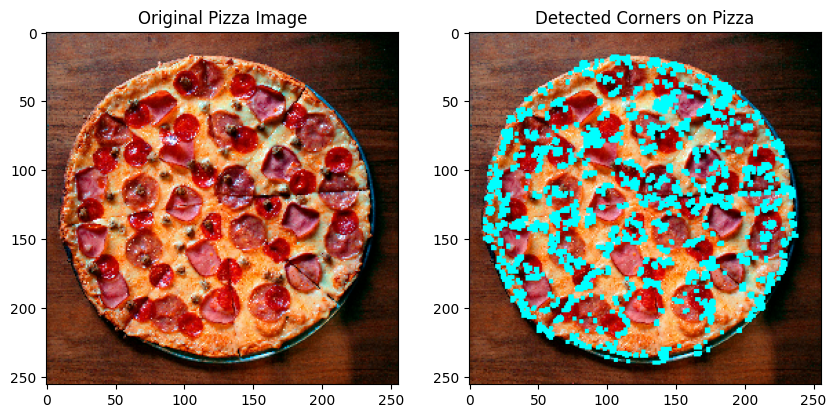

In [197]:
image = all_images["pizza"]

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
dst = cv2.dilate(dst, None)

threshold = 0.02 * dst.max()

corner_image = np.copy(image)
corner_image[dst > threshold] = [0, 255, 255]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Pizza Image")

plt.subplot(1, 2, 2)
plt.imshow(corner_image)
plt.title("Detected Corners on Pizza")

plt.show()


So as we can see that it can detect the whole pizza however. But it cannot detect the slice and its edges of the slices because Harris algorithm is designed for sharp changes in intensity, and circular pepperoni lacks sharp edges.Since the crust has rough edges that create intensity changes, thats why the pizza outline can be detected.

As in the picture of this pizza, the chesse is also not be identified in the clear eyes and as cheese has smooth intensity gradients, which don’t form strong corners.

Harris Corner Detection struggles with circular shapes because it is designed to detect sharp changes in intensity, such as those found at the corners of squares or rectangles. Circular objects, like pepperoni, have smooth intensity transitions without the sudden changes that are typically associated with corners.

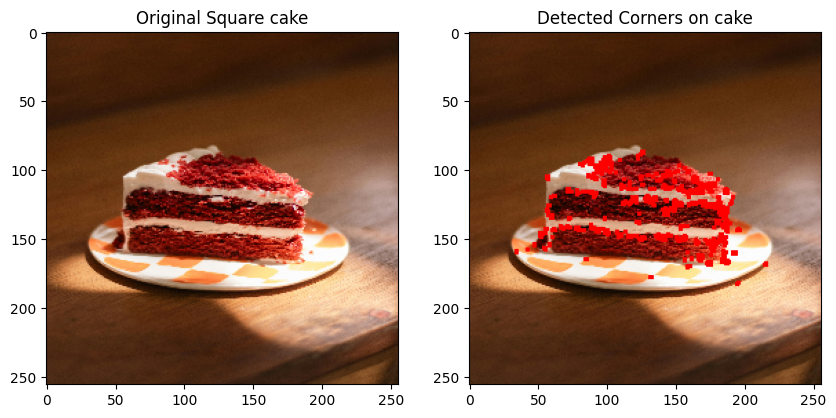

In [192]:
cake = all_images["cake"]
gray_cake = cv2.cvtColor(cake, cv2.COLOR_RGB2GRAY)
dst_cake = cv2.cornerHarris(gray_cake, 2, 3, 0.04)
dst_cake = cv2.dilate(dst_cake, None)


threshold_cake = 0.02 * dst_cake.max()
cake_corners = np.copy(cake)
cake_corners[dst_cake > threshold_cake] = [255, 0, 0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cake)
plt.title("Original Square cake")

plt.subplot(1, 2, 2)
plt.imshow(cake_corners)
plt.title("Detected Corners on cake")

plt.show()


Harris Corner Detection works best with shapes like triangle cakes cause they have clear, sharp corners that allow for easy detection. On the other hand, it struggles with pizza toppings, such as pepperoni and cheese, due to their smooth transitions, which lack the distinct intensity changes needed for effective corner detection.

#Task2

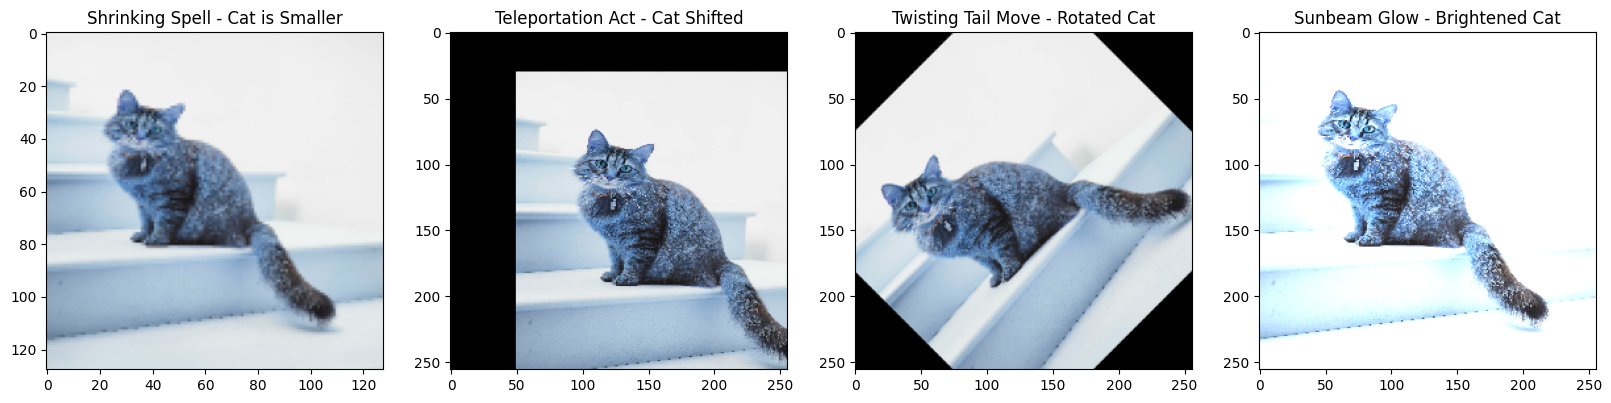

In [193]:
#part1
image = all_images["cat"]

#The Shrinking Spell
small_cat = cv2.resize(image, (image.shape[1]//2, image.shape[0]//2))

#The Teleportation Act
tx, ty = 50, 30
M_translate = np.float32([[1, 0, tx], [0, 1, ty]])
translated_cat = cv2.warpAffine(image, M_translate, (image.shape[1], image.shape[0]))

#The Twisting Tail Move
angle = 45
center = (image.shape[1]//2, image.shape[0]//2)
M_rotate = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_cat = cv2.warpAffine(image, M_rotate, (image.shape[1], image.shape[0]))

#The Sunbeam Glow
bright_cat = np.clip(image * 1.5, 0, 255).astype(np.uint8)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(small_cat, cv2.COLOR_BGR2RGB))
plt.title('Shrinking Spell - Cat is Smaller')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(translated_cat, cv2.COLOR_BGR2RGB))
plt.title('Teleportation Act - Cat Shifted')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(rotated_cat, cv2.COLOR_BGR2RGB))
plt.title('Twisting Tail Move - Rotated Cat')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(bright_cat, cv2.COLOR_BGR2RGB))
plt.title('Sunbeam Glow - Brightened Cat')

plt.show()


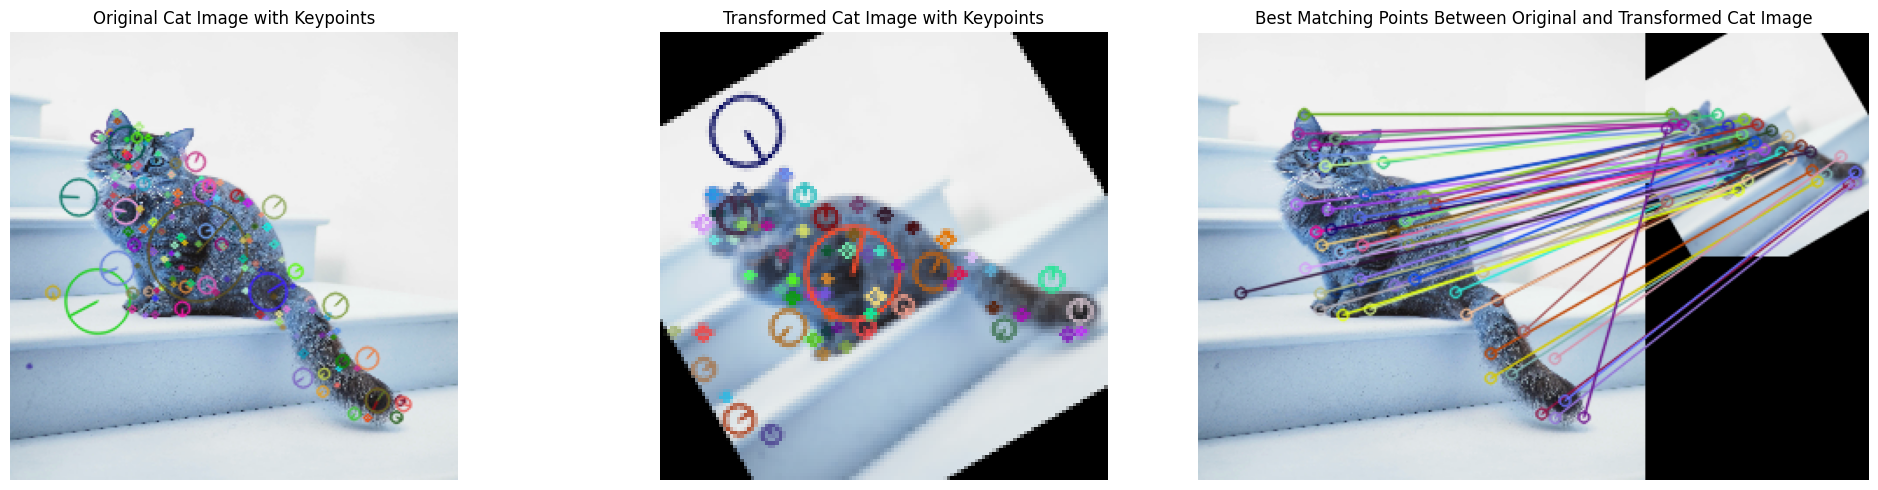

Number of Keypoints Detected in Original Cat Image: 173
Number of Keypoints Detected in Transformed Cat Image: 71
Number of Matching Keypoints: 51


In [194]:
cat_original_rgb = all_images["cat"]
cat_gray = cv2.cvtColor(cat_original_rgb, cv2.COLOR_RGB2GRAY)

cat_transformed = cv2.pyrDown(cat_original_rgb)
num_rows, num_cols = cat_transformed.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
cat_transformed = cv2.warpAffine(cat_transformed, rotation_matrix, (num_cols, num_rows))
cat_transformed_gray = cv2.cvtColor(cat_transformed, cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT_create()
keypoints_cat, descriptors_cat = sift.detectAndCompute(cat_gray, None)
keypoints_transformed, descriptors_transformed = sift.detectAndCompute(cat_transformed_gray, None)

keypoints_img1 = cv2.drawKeypoints(cat_original_rgb, keypoints_cat, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypoints_img2 = cv2.drawKeypoints(cat_transformed, keypoints_transformed, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_cat, descriptors_transformed)
matches = sorted(matches, key=lambda x: x.distance)

match_img = cv2.drawMatches(cat_original_rgb, keypoints_cat, cat_transformed, keypoints_transformed, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

destination_dir = "/content/drive/MyDrive/CSE463-ComputerVision/24241266_PravakarDas_Lab3/"
cv2.imwrite(destination_dir + "transformed_cat.jpg", cat_transformed)
cv2.imwrite(destination_dir + "matched_descriptors.jpg", match_img)

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(keypoints_img1, cv2.COLOR_BGR2RGB))
plt.title('Original Cat Image with Keypoints')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(keypoints_img2, cv2.COLOR_BGR2RGB))
plt.title('Transformed Cat Image with Keypoints')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title('Best Matching Points Between Original and Transformed Cat Image')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Number of Keypoints Detected in Original Cat Image:", len(keypoints_cat))
print("Number of Keypoints Detected in Transformed Cat Image:", len(keypoints_transformed))
print("Number of Matching Keypoints:", len(matches))


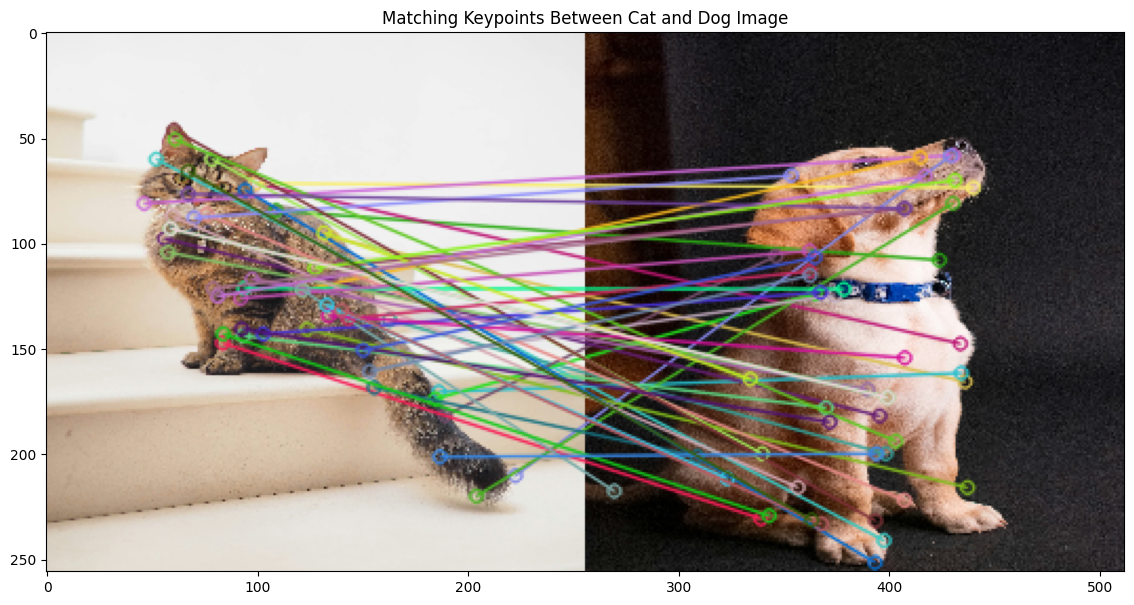


Number of Matching Keypoints Between Cat and Dog: 54


In [195]:
dog_original_rgb = all_images["dog"]
dog_gray = cv2.cvtColor(dog_original_rgb, cv2.COLOR_RGB2GRAY)

keypoints_dog, descriptors_dog = sift.detectAndCompute(dog_gray, None)

matches_cat_dog = bf.match(descriptors_cat, descriptors_dog)
matches_cat_dog = sorted(matches_cat_dog, key=lambda x: x.distance)

match_img_cat_dog = cv2.drawMatches(cat_original_rgb, keypoints_cat, dog_original_rgb, keypoints_dog, matches_cat_dog[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

output_path = destination_dir + "matched_cat_dog.jpg"
cv2.imwrite(output_path, match_img_cat_dog)

plt.figure(figsize=(15, 7))
plt.imshow(match_img_cat_dog)
plt.title("Matching Keypoints Between Cat and Dog Image")
plt.show()

print("\nNumber of Matching Keypoints Between Cat and Dog:", len(matches_cat_dog))



SIFT is a powerful feature detection algorithm that works well for matching images of the same object with transformations (scaling, rotation).
However, when comparing completely different objects (a cat and a dog), SIFT finds some matching keypoints due to similar textures and edges.
But these matches are often weak and not meaningful.
SIFT is not a classification algorithm; it only finds keypoint matches based on structure and texture, not object identity.

#Task3

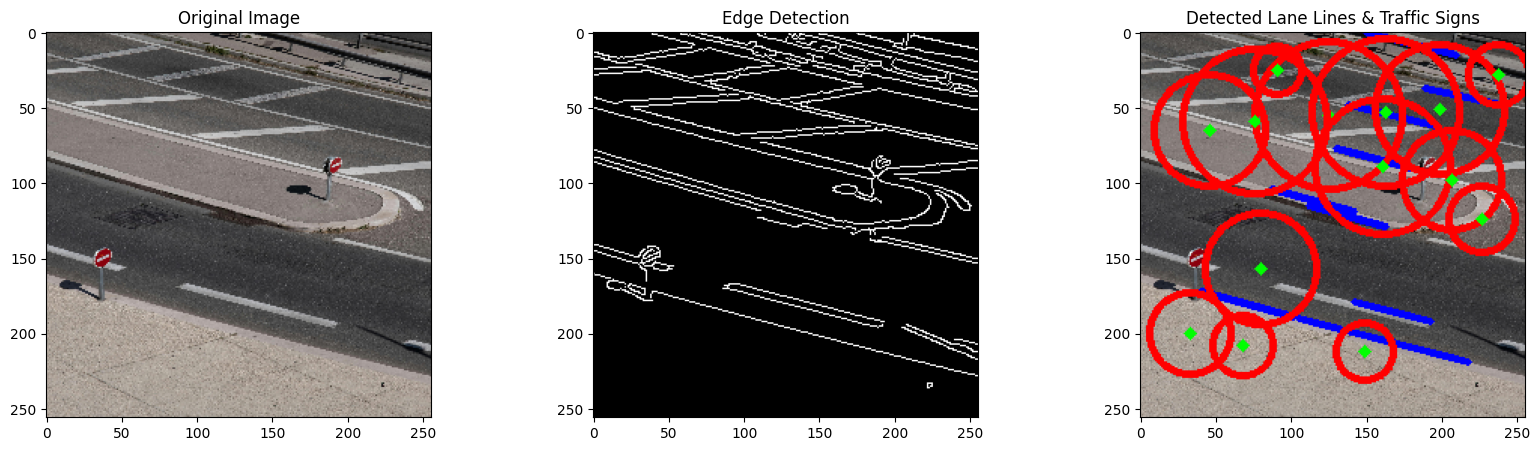

In [196]:
image = all_images["street"]

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)


rho = 1.5
theta = np.pi / 360
threshold = 50
min_line_length = 50
max_line_gap = 1
line_image = np.copy(image)

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 3)

circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                           param1=50, param2=30, minRadius=10, maxRadius=50)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(line_image, (i[0], i[1]), i[2], (255, 0, 0), 3)
        cv2.circle(line_image, (i[0], i[1]), 2, (0, 255, 0), 3)

cv2.imwrite(destination_dir + "edges_of_the_road_signs&marks.jpg", edges)
cv2.imwrite(destination_dir + "detected_lines_and_signs.jpg", line_image)

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')

plt.subplot(1, 3, 3)
plt.imshow(line_image)
plt.title('Detected Lane Lines & Traffic Signs')

plt.show()
